## [Modeling Risk-Return Tradeoffs with OpenBB]

#### Description
In this notebook, we will use **OpenBB** to model risk-return tradeoffs. We'll retrieve historical stock price data, calculate returns and risk for individual assets, and visualize the **efficient frontier** to understand portfolio-level risk-return tradeoffs. This notebook is designed to give insights into how different portfolios can achieve an optimal balance between risk and return.


#### Author
[TheFool76](https://github.com/thefool76)

[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1fTJYTUVg4hjdHvK9xcNqDTMiu3Lfyvre?usp=sharing)





## Installation and Setup

In this section, we ensure that all necessary libraries are installed. The primary library we'll be using is **OpenBB** to access stock price data. We'll also use standard data analysis libraries like `numpy`, `pandas`, and `matplotlib` for calculations and visualization.

If you haven't installed these libraries, you can do so by running the following:
```bash
!pip install openbb-sdk
!pip install numpy pandas matplotlib
```


In [5]:
# If you are running this notebook in Colab, you can run the following command to install the OpenBB Platform:
!pip install openbb
!pip install numpy
!pip install pandas
!pip install matplotlib

In [6]:

# Import necessary libraries (Important)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from openbb import obb

# Here is the Function to calculate daily and annualized returns
def calculate_returns(prices):
    daily_returns = prices.pct_change().dropna()
    annual_returns = daily_returns.mean() * 252
    return daily_returns, annual_returns

# this Function to calculate portfolio volatility
def calculate_volatility(daily_returns, weights):
    cov_matrix = daily_returns.cov() * 252
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return portfolio_volatility


### **Data Retrieval**
## Fetching Historical Data

In this step, we use OpenBB to fetch historical price data for a selection of stocks. The data will include daily closing prices, which we will later use to calculate returns and risk metrics.

Here, we choose three stocks: **Apple (AAPL)**, **Microsoft (MSFT)**, and **Tesla (TSLA)**. You can modify the stock symbols to include other companies if desired. The data is fetched via OpenBB's `equity.price.historical()` function, and we load the closing prices into a `pandas` DataFrame for analysis.

In [7]:

# now fetch historical price data for multiple stocks
symbols = ["AAPL", "MSFT", "TSLA"]
data = {symbol: obb.equity.price.historical(symbol=symbol, provider="yfinance").to_df()["close"] for symbol in symbols}

# Created a DataFrame with the historical closing prices
price_df = pd.DataFrame(data)

# now display the first few rows
price_df.head()


,AAPL,MSFT,TSLA
date,,,
2023-10-13,178.850006,327.730011,251.119995
2023-10-16,178.720001,332.640015,253.919998
2023-10-17,177.149994,332.059998,254.850006
2023-10-18,175.839996,330.109985,242.679993
2023-10-19,175.460007,331.320007,220.110001


## Risk-Return Analysis

Once we have the historical price data, we move on to calculating returns and risk.

### **Returns**:
- We calculate both **daily** and **annualized returns** for each stock.
- Daily returns are computed by the percentage change in price from one day to the next.
- Annualized returns are derived by multiplying the average daily returns by 252 (the typical number of trading days in a year).

### **Portfolio Risk**:
- **Volatility** (or risk) is calculated using the covariance of the daily returns. The formula takes into account how each stock's price movement correlates with others in the portfolio.
- The risk of a portfolio is a weighted sum of the volatilities of individual stocks, adjusted by their covariances.

We define an equal-weighted portfolio as a starting point and compute the portfolio's expected return and volatility.


In [8]:

# I will calculate daily and annualized returns
daily_returns, annual_returns = calculate_returns(price_df)

# Example portfolio weights (equal weighting)
weights = np.array([1/3, 1/3, 1/3])

# Now Portfolio annualized return
portfolio_return = np.dot(annual_returns, weights)

# Portfolio volatility (risk)
portfolio_volatility = calculate_volatility(daily_returns, weights)

# Output the  results
print(f"Portfolio Annualized Return: {portfolio_return:.2f}")
print(f"Portfolio Volatility (Risk): {portfolio_volatility:.2f}")


Portfolio Annualized Return: 0.18
Portfolio Volatility (Risk): 0.26



## Portfolio Optimization and Efficient Frontier

In this section, we aim to plot the **Efficient Frontier**, which represents the set of portfolios that provide the highest return for a given level of risk.

### **Efficient Frontier**:
- The efficient frontier shows different portfolio allocations, each with varying levels of risk (volatility) and return.
- By simulating random portfolio allocations, we can plot this frontier and determine the optimal balance of stocks in a portfolio.

For each simulated portfolio, we:
1. Randomly assign weights to the stocks.
2. Calculate the expected return and risk based on these weights.
3. Plot the results to visualize the relationship between risk and return.

The **Sharpe Ratio**, which measures risk-adjusted return, is also computed. Portfolios with higher Sharpe Ratios are generally more attractive because they offer more return per unit of risk.

## Visualization and Interpretation

After calculating and simulating various portfolio allocations, we plot the **Efficient Frontier** using a scatter plot. Each point on the plot represents a portfolio with different risk-return characteristics.

- The x-axis represents **Volatility (Risk)**, which measures the standard deviation of portfolio returns.
- The y-axis represents **Return**, indicating the expected profit from the portfolio.

We use color-coding to represent the **Sharpe Ratio**. Portfolios with higher Sharpe Ratios are preferred, as they offer better returns relative to the risk taken.

By analyzing the efficient frontier, you can identify portfolios that are likely to perform well given your risk tolerance and return expectations.


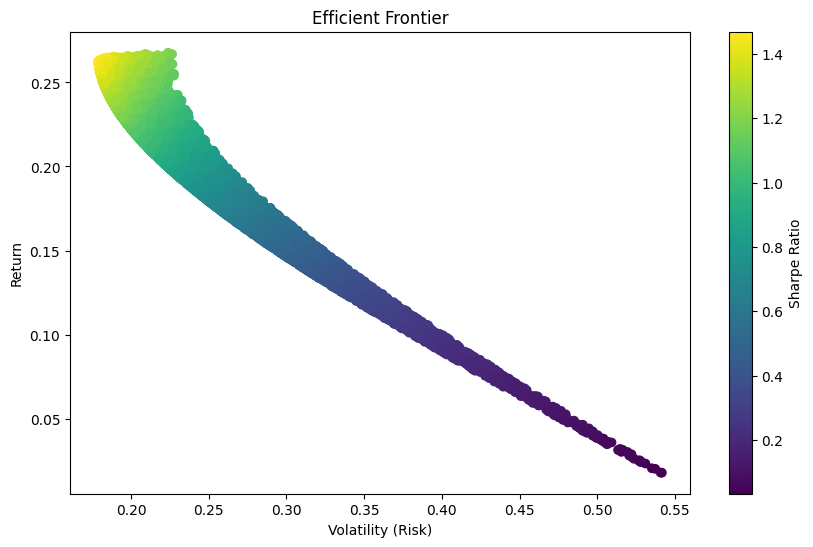

In [9]:

# Now we will Simulate different portfolio allocations to plot the efficient frontier
num_portfolios = 10000
results = np.zeros((3, num_portfolios))

for i in range(num_portfolios):
    weights = np.random.random(len(symbols))
    weights /= np.sum(weights)
    portfolio_return = np.dot(annual_returns, weights)
    portfolio_volatility = calculate_volatility(daily_returns, weights)
    results[0,i] = portfolio_volatility
    results[1,i] = portfolio_return
    results[2,i] = results[1,i] / results[0,i]  # Sharpe Ratio

# Plot the efficient frontier and show the output
plt.figure(figsize=(10, 6))
plt.scatter(results[0,:], results[1,:], c=results[2,:], cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility (Risk)')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.show()
